# Practice Activity - Keras Neural Networks
## Nick Bias
### 5/20/22
### Libraries 

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

### Assignment Specs
- Implement at least one recurrent neural network model (e.g. SimpleRNN, LSTM, etc.) with these data to predict Sales.
    - Remember that train-testing works a little differently for time series data (i.e. it should NOT be random)
- A secondary goal of this assignment is to explore this very different, temporal prediction task.
    - Experiment with at least 3 different train-test splits
    - Experiment with at least 3 different values for the amount of history to include in the model (e.g. one time step, two, three, etc.). The data preprocessing for this may vary by the type of RNN used.
    - Plot your results! Raw data with predictions...

## Import Data

In [2]:
dataLink = "Data/Week8/ma_lga_12345.csv"

### Functions for Models 

In [1]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[0], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

In [2]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [3]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))   

In [5]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

## Models 
### Model 1: Train-Test-Split = 80%, Time Steps = 12

In [13]:
train_data, test_data, data = get_train_test(dataLink)

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [14]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
23/23 - 1s - loss: 0.1133 - 898ms/epoch - 39ms/step
Epoch 2/20
23/23 - 0s - loss: 0.0575 - 68ms/epoch - 3ms/step
Epoch 3/20
23/23 - 0s - loss: 0.0283 - 72ms/epoch - 3ms/step
Epoch 4/20
23/23 - 0s - loss: 0.0183 - 68ms/epoch - 3ms/step
Epoch 5/20
23/23 - 0s - loss: 0.0146 - 67ms/epoch - 3ms/step
Epoch 6/20
23/23 - 0s - loss: 0.0123 - 70ms/epoch - 3ms/step
Epoch 7/20
23/23 - 0s - loss: 0.0106 - 69ms/epoch - 3ms/step
Epoch 8/20
23/23 - 0s - loss: 0.0100 - 68ms/epoch - 3ms/step
Epoch 9/20
23/23 - 0s - loss: 0.0090 - 67ms/epoch - 3ms/step
Epoch 10/20
23/23 - 0s - loss: 0.0087 - 70ms/epoch - 3ms/step
Epoch 11/20
23/23 - 0s - loss: 0.0085 - 69ms/epoch - 3ms/step
Epoch 12/20
23/23 - 0s - loss: 0.0082 - 70ms/epoch - 3ms/step
Epoch 13/20
23/23 - 0s - loss: 0.0082 - 71ms/epoch - 3ms/step
Epoch 14/20
23/23 - 0s - loss: 0.0078 - 70ms/epoch - 3ms/step
Epoch 15/20
23/23 - 0s - loss: 0.0076 - 68ms/epoch - 3ms/step
Epoch 16/20
23/23 - 0s - loss: 0.0076 - 71ms/epoch - 3ms/step
Epoch 17/20
23/

In [15]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [16]:
# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.082 RMSE
Test RMSE: 0.063 RMSE


When the Train-Test-Split is 80% and the number of Time Steps is 12, we can see that the Recurrent Neural Network has a Trained RMSE of 0.082 and a Test RMSE of 0.063. For RMSE the closer the number is to zero, the better the model fit. We can see that the model performed better on the testing data rather than the training data. However, this is only by 0.019, which is a rather small difference. 

If we look below, we can see how the predictions compared to the actual results. The orange line (Predictions) follows fairly closely with the blue line (actual results). Overall, this Nueral Network fits is good at predicting sales. 

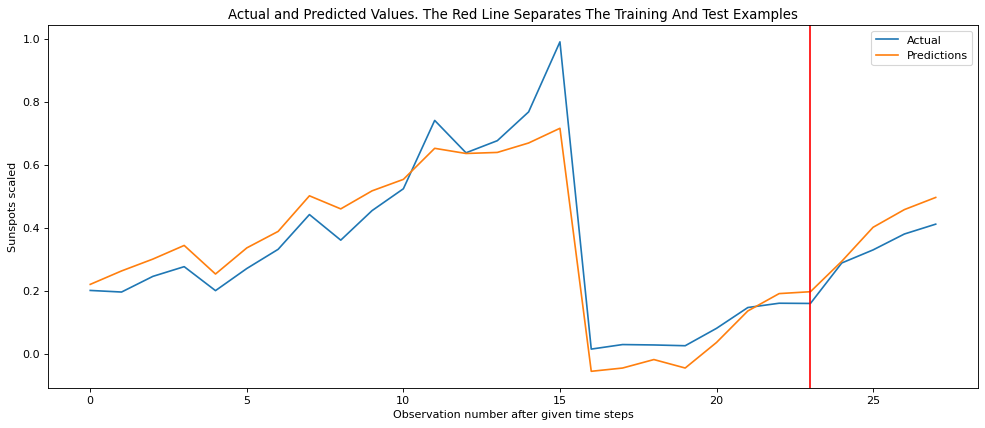

In [17]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

### Model 2: Train-Test-Split = 80%, Time Steps = 5

In [18]:
train_data, test_data, data = get_train_test(dataLink)

time_steps = 5
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
55/55 - 1s - loss: 0.2955 - 756ms/epoch - 14ms/step
Epoch 2/20
55/55 - 0s - loss: 0.1357 - 115ms/epoch - 2ms/step
Epoch 3/20
55/55 - 0s - loss: 0.0959 - 111ms/epoch - 2ms/step
Epoch 4/20
55/55 - 0s - loss: 0.0756 - 115ms/epoch - 2ms/step
Epoch 5/20
55/55 - 0s - loss: 0.0584 - 110ms/epoch - 2ms/step
Epoch 6/20
55/55 - 0s - loss: 0.0449 - 110ms/epoch - 2ms/step
Epoch 7/20
55/55 - 0s - loss: 0.0376 - 112ms/epoch - 2ms/step
Epoch 8/20
55/55 - 0s - loss: 0.0335 - 106ms/epoch - 2ms/step
Epoch 9/20
55/55 - 0s - loss: 0.0312 - 109ms/epoch - 2ms/step
Epoch 10/20
55/55 - 0s - loss: 0.0294 - 105ms/epoch - 2ms/step
Epoch 11/20
55/55 - 0s - loss: 0.0274 - 114ms/epoch - 2ms/step
Epoch 12/20
55/55 - 0s - loss: 0.0255 - 114ms/epoch - 2ms/step
Epoch 13/20
55/55 - 0s - loss: 0.0244 - 109ms/epoch - 2ms/step
Epoch 14/20
55/55 - 0s - loss: 0.0234 - 106ms/epoch - 2ms/step
Epoch 15/20
55/55 - 0s - loss: 0.0221 - 106ms/epoch - 2ms/step
Epoch 16/20
55/55 - 0s - loss: 0.0212 - 114ms/epoch - 2ms/step


In [19]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [20]:
# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.134 RMSE
Test RMSE: 0.050 RMSE


This model had a greater difference in the Train and Test RMSEs. Train RMSE is 0.134, while the Test RMSE is 0.05. This is a 0.084 difference. The Train RMSE scored worse than the previous model's Train and Test RMSEs, but the Test RMSE scored better than the previous model. Overall, the RMSE is good. 

If we look below, we can see that the Predictions followed the actual results closely, except for times steps 30-40. The predictions were more off than they were in the previous model. 

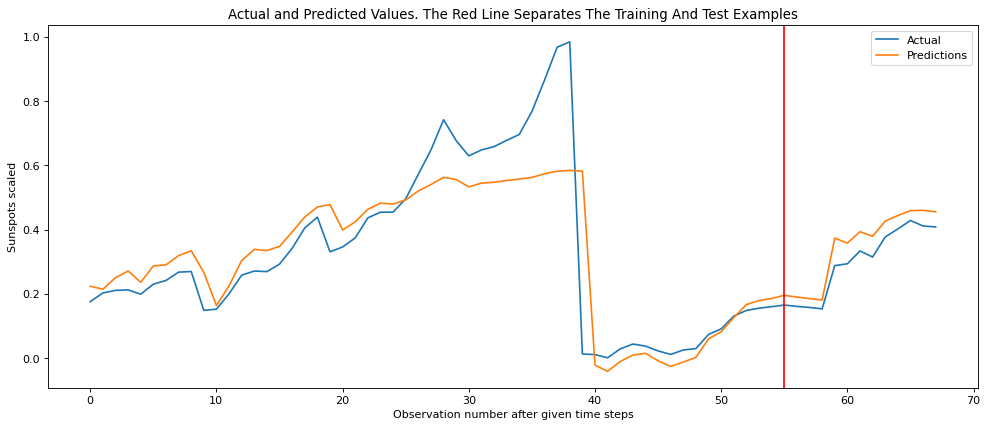

In [21]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

### Model 3: Train-Test-Split = 80%, Time Steps = 1

In [25]:
train_data, test_data, data = get_train_test(dataLink)

time_steps = 1
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
276/276 - 1s - loss: 0.0285 - 1s/epoch - 4ms/step
Epoch 2/20
276/276 - 0s - loss: 0.0133 - 367ms/epoch - 1ms/step
Epoch 3/20
276/276 - 0s - loss: 0.0086 - 356ms/epoch - 1ms/step
Epoch 4/20
276/276 - 0s - loss: 0.0070 - 376ms/epoch - 1ms/step
Epoch 5/20
276/276 - 0s - loss: 0.0065 - 341ms/epoch - 1ms/step
Epoch 6/20
276/276 - 0s - loss: 0.0062 - 345ms/epoch - 1ms/step
Epoch 7/20
276/276 - 0s - loss: 0.0061 - 342ms/epoch - 1ms/step
Epoch 8/20
276/276 - 0s - loss: 0.0059 - 334ms/epoch - 1ms/step
Epoch 9/20
276/276 - 0s - loss: 0.0058 - 363ms/epoch - 1ms/step
Epoch 10/20
276/276 - 0s - loss: 0.0057 - 356ms/epoch - 1ms/step
Epoch 11/20
276/276 - 0s - loss: 0.0056 - 343ms/epoch - 1ms/step
Epoch 12/20
276/276 - 0s - loss: 0.0055 - 343ms/epoch - 1ms/step
Epoch 13/20
276/276 - 0s - loss: 0.0055 - 365ms/epoch - 1ms/step
Epoch 14/20
276/276 - 0s - loss: 0.0054 - 348ms/epoch - 1ms/step
Epoch 15/20
276/276 - 0s - loss: 0.0052 - 339ms/epoch - 1ms/step
Epoch 16/20
276/276 - 0s - loss: 0.00

In [26]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.069 RMSE
Test RMSE: 0.034 RMSE


This Model achieved the lowest RMSE of all the Models with a Train-Test-Split of 80%. Its Train RMSE is 0.069, while the Test is 0.034, which is almost half of the Train RMSE. These are fantastic results and it means our model is good fit.

We can cnfirm this by looking at the graph below. We can see that the Prediction Line follows the Actual Line very closely. At some points the lines are right on top of each other. That means the predictions are very close to the actual results. 

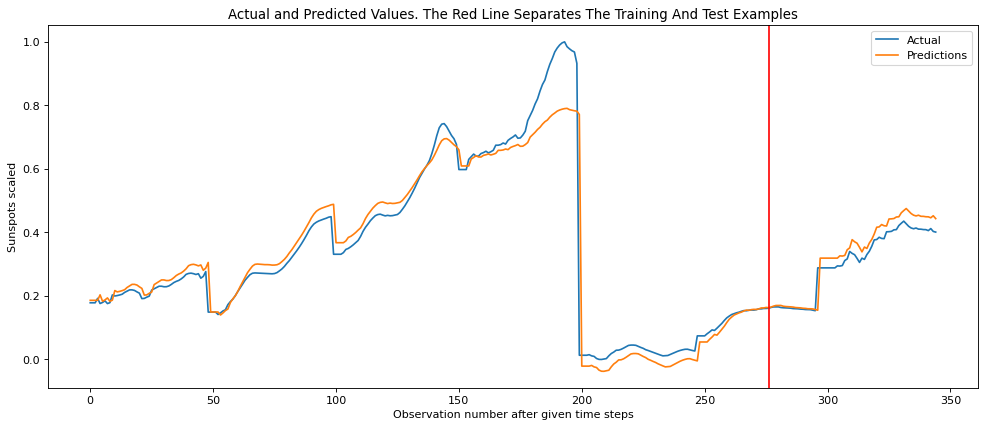

In [27]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

### Model 4: Train-Test-Split = 60%, Time Steps = 12

In [22]:
train_data, test_data, data = get_train_test(dataLink, split_percent=0.6)

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
17/17 - 1s - loss: 0.1081 - 691ms/epoch - 41ms/step
Epoch 2/20
17/17 - 0s - loss: 0.0740 - 49ms/epoch - 3ms/step
Epoch 3/20
17/17 - 0s - loss: 0.0547 - 54ms/epoch - 3ms/step
Epoch 4/20
17/17 - 0s - loss: 0.0445 - 48ms/epoch - 3ms/step
Epoch 5/20
17/17 - 0s - loss: 0.0399 - 52ms/epoch - 3ms/step
Epoch 6/20
17/17 - 0s - loss: 0.0372 - 49ms/epoch - 3ms/step
Epoch 7/20
17/17 - 0s - loss: 0.0363 - 51ms/epoch - 3ms/step
Epoch 8/20
17/17 - 0s - loss: 0.0355 - 50ms/epoch - 3ms/step
Epoch 9/20
17/17 - 0s - loss: 0.0346 - 48ms/epoch - 3ms/step
Epoch 10/20
17/17 - 0s - loss: 0.0340 - 48ms/epoch - 3ms/step
Epoch 11/20
17/17 - 0s - loss: 0.0333 - 50ms/epoch - 3ms/step
Epoch 12/20
17/17 - 0s - loss: 0.0326 - 48ms/epoch - 3ms/step
Epoch 13/20
17/17 - 0s - loss: 0.0319 - 51ms/epoch - 3ms/step
Epoch 14/20
17/17 - 0s - loss: 0.0312 - 55ms/epoch - 3ms/step
Epoch 15/20
17/17 - 0s - loss: 0.0306 - 49ms/epoch - 3ms/step
Epoch 16/20
17/17 - 0s - loss: 0.0291 - 48ms/epoch - 3ms/step
Epoch 17/20
17/

In [23]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.144 RMSE
Test RMSE: 0.051 RMSE


The difference between the Train and Test RMSEs is now 0.093. These RMSEs are slightly worse than the previous model, but not by much. However, both RMSEs are under 0.2, so it is still a good neural network for the data.

Looking below, this graphic is very similar to the previous model, so they are not that different after all.

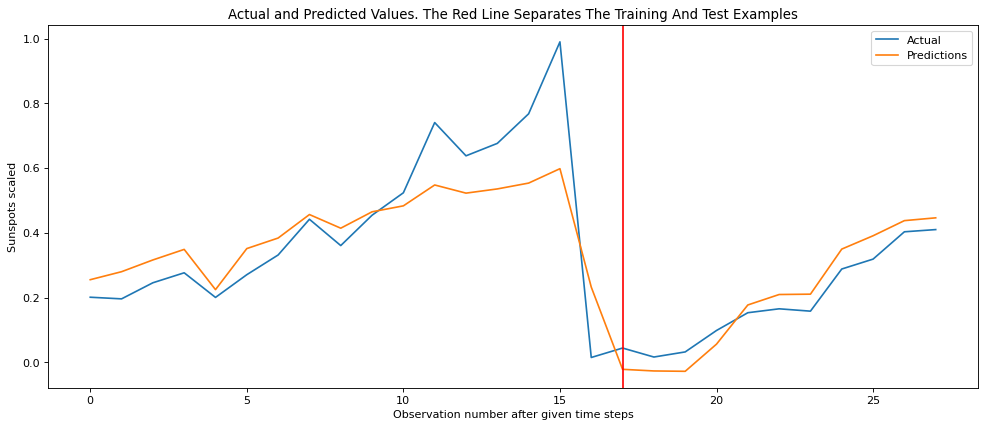

In [24]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

### Model 5: Train-Test-Split = 60%, Time Steps = 5

In [28]:
train_data, test_data, data = get_train_test(dataLink, split_percent=0.6)

time_steps = 5
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
41/41 - 1s - loss: 1.8809 - 927ms/epoch - 23ms/step
Epoch 2/20
41/41 - 0s - loss: 1.6889 - 76ms/epoch - 2ms/step
Epoch 3/20
41/41 - 0s - loss: 1.3513 - 78ms/epoch - 2ms/step
Epoch 4/20
41/41 - 0s - loss: 0.9991 - 75ms/epoch - 2ms/step
Epoch 5/20
41/41 - 0s - loss: 0.6911 - 71ms/epoch - 2ms/step
Epoch 6/20
41/41 - 0s - loss: 0.4731 - 75ms/epoch - 2ms/step
Epoch 7/20
41/41 - 0s - loss: 0.3411 - 77ms/epoch - 2ms/step
Epoch 8/20
41/41 - 0s - loss: 0.2715 - 76ms/epoch - 2ms/step
Epoch 9/20
41/41 - 0s - loss: 0.2356 - 79ms/epoch - 2ms/step
Epoch 10/20
41/41 - 0s - loss: 0.2092 - 79ms/epoch - 2ms/step
Epoch 11/20
41/41 - 0s - loss: 0.1924 - 77ms/epoch - 2ms/step
Epoch 12/20
41/41 - 0s - loss: 0.1784 - 75ms/epoch - 2ms/step
Epoch 13/20
41/41 - 0s - loss: 0.1689 - 74ms/epoch - 2ms/step
Epoch 14/20
41/41 - 0s - loss: 0.1587 - 71ms/epoch - 2ms/step
Epoch 15/20
41/41 - 0s - loss: 0.1507 - 71ms/epoch - 2ms/step
Epoch 16/20
41/41 - 0s - loss: 0.1450 - 77ms/epoch - 2ms/step
Epoch 17/20
41/

In [29]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.349 RMSE
Test RMSE: 0.439 RMSE


This is the worst performing model, compared to the other model up until this point. The Train RMSE is 0.349, while the Test RMSE is 0.439. As a general rule of thumb it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. However, if we look at the plot of the results, we can see that this model is not performing as well as the others. Previous models predictions followed the actual results very closely. However, this model's predictions seem to zigzag and cross back and forth. Overall, there are better  Neural Network models. 

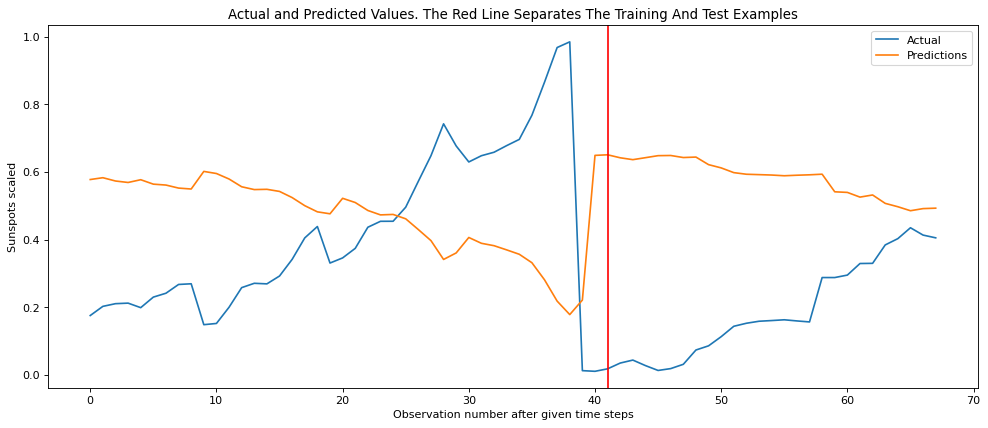

In [30]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

### Model 6: Train-Test-Split = 60%, Time Steps = 1

In [31]:
train_data, test_data, data = get_train_test(dataLink, split_percent=0.6)

time_steps = 1
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
207/207 - 1s - loss: 0.0063 - 945ms/epoch - 5ms/step
Epoch 2/20
207/207 - 0s - loss: 0.0057 - 286ms/epoch - 1ms/step
Epoch 3/20
207/207 - 0s - loss: 0.0058 - 253ms/epoch - 1ms/step
Epoch 4/20
207/207 - 0s - loss: 0.0057 - 263ms/epoch - 1ms/step
Epoch 5/20
207/207 - 0s - loss: 0.0057 - 256ms/epoch - 1ms/step
Epoch 6/20
207/207 - 0s - loss: 0.0057 - 277ms/epoch - 1ms/step
Epoch 7/20
207/207 - 0s - loss: 0.0057 - 269ms/epoch - 1ms/step
Epoch 8/20
207/207 - 0s - loss: 0.0057 - 266ms/epoch - 1ms/step
Epoch 9/20
207/207 - 0s - loss: 0.0057 - 254ms/epoch - 1ms/step
Epoch 10/20
207/207 - 0s - loss: 0.0056 - 254ms/epoch - 1ms/step
Epoch 11/20
207/207 - 0s - loss: 0.0057 - 282ms/epoch - 1ms/step
Epoch 12/20
207/207 - 0s - loss: 0.0056 - 257ms/epoch - 1ms/step
Epoch 13/20
207/207 - 0s - loss: 0.0056 - 255ms/epoch - 1ms/step
Epoch 14/20
207/207 - 0s - loss: 0.0057 - 264ms/epoch - 1ms/step
Epoch 15/20
207/207 - 0s - loss: 0.0056 - 264ms/epoch - 1ms/step
Epoch 16/20
207/207 - 0s - loss: 0

In [32]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.074 RMSE
Test RMSE: 0.049 RMSE


This Model performed very well. Its Train RMSE is 0.074, while the Test RMSE is 0.049. These values are very low and compared well with the other good preforming models. If we look at the graph below, we can see that the two lines are often overlapping each other. This means the model is predicting very closely to the actual results. 

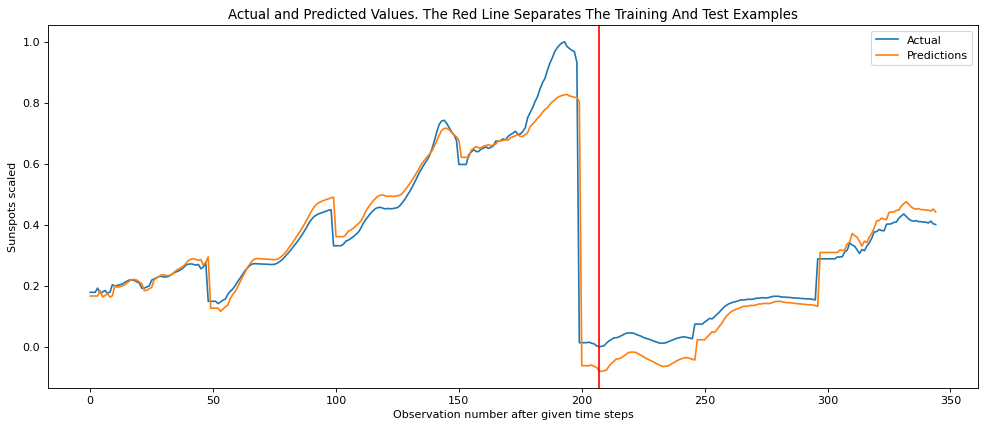

In [33]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

### Model 7: Train-Test-Split = 90%, Time Steps = 1
I will only use 1 time step for this train test split as time step 1 has always produced the best results out of the previous 6 models 

In [37]:
train_data, test_data, data = get_train_test(dataLink, split_percent=0.9)

time_steps = 1
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
311/311 - 1s - loss: 0.2442 - 1s/epoch - 3ms/step
Epoch 2/20
311/311 - 0s - loss: 0.0955 - 396ms/epoch - 1ms/step
Epoch 3/20
311/311 - 0s - loss: 0.0551 - 400ms/epoch - 1ms/step
Epoch 4/20
311/311 - 0s - loss: 0.0287 - 386ms/epoch - 1ms/step
Epoch 5/20
311/311 - 0s - loss: 0.0150 - 402ms/epoch - 1ms/step
Epoch 6/20
311/311 - 0s - loss: 0.0089 - 381ms/epoch - 1ms/step
Epoch 7/20
311/311 - 0s - loss: 0.0067 - 386ms/epoch - 1ms/step
Epoch 8/20
311/311 - 0s - loss: 0.0060 - 369ms/epoch - 1ms/step
Epoch 9/20
311/311 - 0s - loss: 0.0057 - 390ms/epoch - 1ms/step
Epoch 10/20
311/311 - 0s - loss: 0.0056 - 386ms/epoch - 1ms/step
Epoch 11/20
311/311 - 0s - loss: 0.0055 - 371ms/epoch - 1ms/step
Epoch 12/20
311/311 - 0s - loss: 0.0054 - 381ms/epoch - 1ms/step
Epoch 13/20
311/311 - 0s - loss: 0.0053 - 395ms/epoch - 1ms/step
Epoch 14/20
311/311 - 0s - loss: 0.0052 - 375ms/epoch - 1ms/step
Epoch 15/20
311/311 - 0s - loss: 0.0051 - 394ms/epoch - 1ms/step
Epoch 16/20
311/311 - 0s - loss: 0.00

In [38]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.068 RMSE
Test RMSE: 0.043 RMSE


This model's RMSEs were lower than the previous model. The Train RMSE is 0.068, which is the lowest of any of the Train RMSEs in this assignment. The Test RMSE is 0.043, which is better than the previous model. If we look at the graph below, we can see that the two lines are often overlapping each other. This means the model is performed very well and predicting very closely to the actual results. 

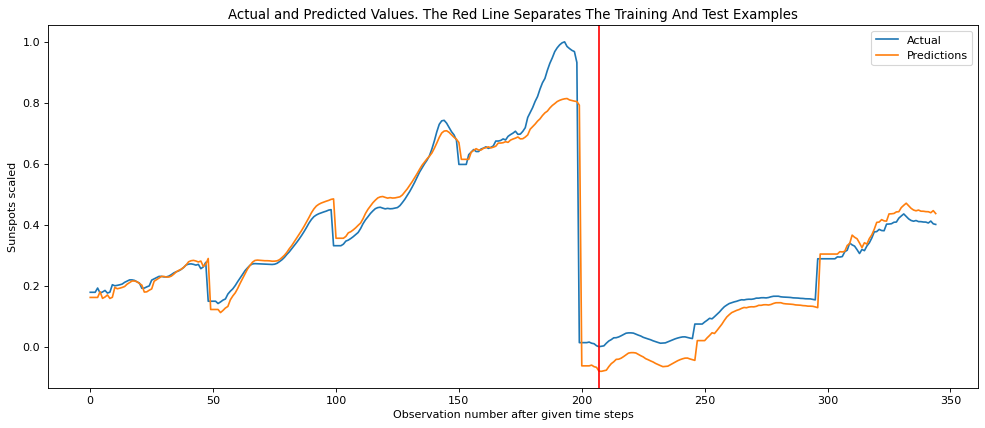

In [36]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

## Final Thoughts 
I noticed that the smaller the Time Steps and the larger the Train-Test-Split, the better the Recurrent Neural Network performs overall. 